### this script contains the following:

#### 1. importing libraries and data
#### 2. data cleaning
#### 3. data prep for regression analysis 
#### 4. supervised machine learning 
     linear regression

### 1. importing libraries and data

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn # scikit-learn
from sklearn.model_selection import train_test_split # modules for linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
# seting up folder path

path = '/Users/martamajer/Desktop/Desktop - Marta’s MacBook Air - 1/10-2024 Mental Health Database/'

# importing datasets

mental_illness_prevalence_burden_daly = pd.read_csv(os.path.join(path, '02 Data','Prepared Data', 'mental_illness_prevalence_burden_daly.csv'), index_col = False)
anxiety_disorders_treatment_gap = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', '05_anxiety_disorders_treatment_gap.csv'), index_col = False)
depressive_symptoms_across_us_population = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', '06_depressive_symptoms_across_us_population.csv'), index_col = False)
adult_population_covered_in_primary_data_on_the_prevalence_of_mental_illnesses = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', '04_adult_population_covered_in_primary_data_on_the_prevalence_of_mental_illnesses.csv'), index_col = False)

### 2. data cleaning

In [6]:
# dropping the column that is unneccesary 

mental_illness_prevalence_burden_daly.drop('Unnamed: 0', axis=1, inplace=True)

In [7]:
mental_illness_prevalence_burden_daly.head(5)

,Country(Entity),Year,Code,Rate: Schizophrenia,Rate: Depressive disorders,Rate: Anxiety disorders,Rate: Bipolar disorders,Rate: Eating disorders,DALYs: Schizophrenia,DALYs: Depressive disorders,DALYs: Anxiety disorders,DALYs: Bipolar disorder,DALYs: Eating disorders
0,Afghanistan,1990,AFG,0.223206,4.996118,4.713314,0.703023,0.127700,138.24825,895.22565,440.33000,147.64412,26.471115
1,Afghanistan,1991,AFG,0.222454,4.989290,4.702100,0.702069,0.123256,137.76122,893.88434,439.47202,147.56696,25.548681
2,Afghanistan,1992,AFG,0.221751,4.981346,4.683743,0.700792,0.118844,137.08030,892.34973,437.60718,147.13086,24.637949
3,Afghanistan,1993,AFG,0.220987,4.976958,4.673549,0.700087,0.115089,136.48602,891.51587,436.69104,146.78812,23.863169
4,Afghanistan,1994,AFG,0.220183,4.977782,4.670810,0.699898,0.111815,136.18323,891.39160,436.76800,146.58481,23.189074


##### setting up the head() for no limits

In [20]:
pd.set_option('display.max_rows', None)

#### The key objectives of this analysis are to:

This study hypothesizes that the adoption of progressive treatment methods, specifically psychedelic therapies, in the United States, Canada, Brazil, the Netherlands, Jamaica, Switzerland, Portugal, and Mexico is associated with a statistically significant decrease in the prevalence of mental disorders compared to countries that do not implement these treatments.

1. Identify the most common mental health disorders globally.
2. Analyze changes in disorder prevalence over time.
3. Determine which countries are facing increasing mental health challenges and which are improving in managing these conditions.

#### creating flag to divide progressive countries in terms of mental health treatments vs. rest of the world as Country Group column

In [87]:
# Step 1: List of countries to group together
grouped_countries = ['Portugal', 'United States', 'Mexico', 'Netherlands', 'Canada', 'Brazil', 'Jamaica', 'Switzerland']

# Step 2: Create a new column 'Country Group' to classify the countries
mental_illness_prevalence_burden_daly['Country Group'] = mental_illness_prevalence_burden_daly['Country(Entity)'].apply(
    lambda x: 'Progressive methods countries' if x in grouped_countries else 'Rest of the world'
)

# Step 4: Display the first few rows of the 2019 subset
mental_illness_prevalence_burden_daly.head(2)

,Country(Entity),Year,Code,Rate: Schizophrenia,Rate: Depressive disorders,Rate: Anxiety disorders,Rate: Bipolar disorders,Rate: Eating disorders,DALYs: Schizophrenia,DALYs: Depressive disorders,DALYs: Anxiety disorders,DALYs: Bipolar disorder,DALYs: Eating disorders,Country Group
0,Afghanistan,1990,AFG,0.223206,4.996118,4.713314,0.703023,0.127700,138.24825,895.22565,440.33000,147.64412,26.471115,Rest of the world
1,Afghanistan,1991,AFG,0.222454,4.989290,4.702100,0.702069,0.123256,137.76122,893.88434,439.47202,147.56696,25.548681,Rest of the world


In [88]:
mental_illness_prevalence_burden_daly.shape

(6150, 14)

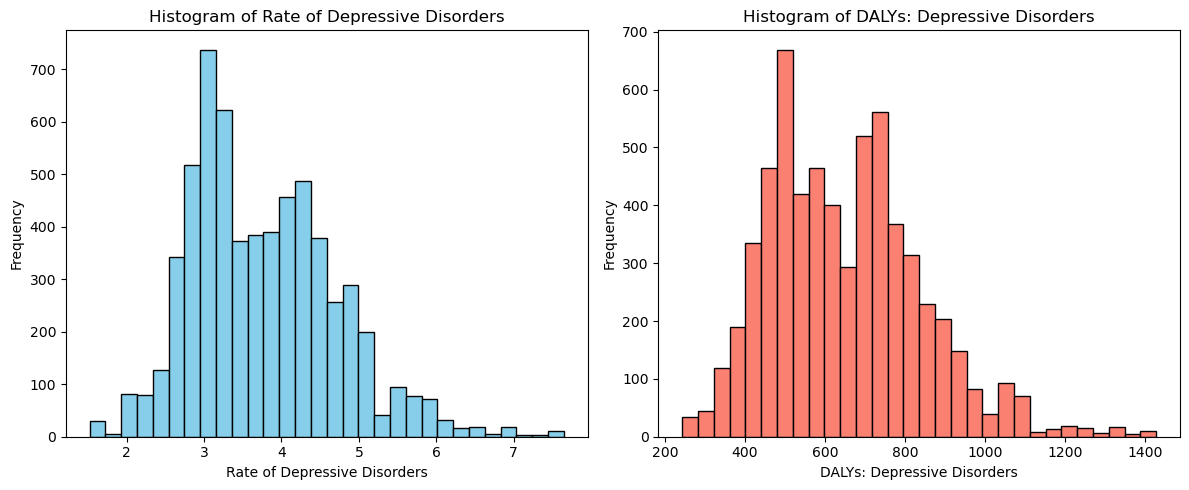

In [114]:
# Plotting histograms for both variables
plt.figure(figsize=(12, 5))

# Histogram for Rate of Depressive Disorders
plt.subplot(1, 2, 1)
plt.hist(mental_illness_prevalence_burden_daly['Rate: Depressive disorders'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Rate of Depressive Disorders')
plt.xlabel('Rate of Depressive Disorders')
plt.ylabel('Frequency')

# Histogram for DALYs: Depressive Disorders
plt.subplot(1, 2, 2)
plt.hist(mental_illness_prevalence_burden_daly['DALYs: Depressive disorders'], bins=30, color='salmon', edgecolor='black')
plt.title('Histogram of DALYs: Depressive Disorders')
plt.xlabel('DALYs: Depressive Disorders')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### 3. Data prep for regression analysis 

### Hypothesis
The burden of depression, as measured by Disability-Adjusted Life Years (DALYs), is positively associated with the prevalence rates of depression disorder, indicating that regions with higher DALYs experience higher rates of diagnosed depression.

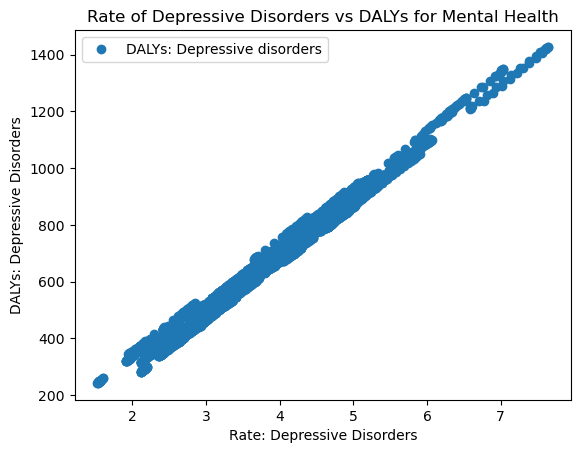

In [93]:
# Create a scatterplot using matplotlib
mental_illness_prevalence_burden_daly.plot(
    x='Rate: Depressive disorders', 
    y='DALYs: Depressive disorders', 
    style='o'  # The style option creates a scatterplot; without it, we only have lines.
)

# Add title and labels
plt.title('Rate of Depressive Disorders vs DALYs for Mental Health')
plt.xlabel('Rate: Depressive Disorders')  
plt.ylabel('DALYs: Depressive Disorders')  

# Show the plot
plt.show()

In [94]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = mental_illness_prevalence_burden_daly['Rate: Depressive disorders'].values.reshape(-1, 1)
y = mental_illness_prevalence_burden_daly['DALYs: Depressive disorders'].values.reshape(-1, 1)

In [95]:
X

array([[4.996118 ],
       [4.9892898],
       [4.9813457],
       ...,
       [3.4119654],
       [3.406929 ],
       [3.3954756]])

In [96]:
y

array([[895.22565],
       [893.88434],
       [892.34973],
       ...,
       [547.6227 ],
       [546.57184],
       [544.5316 ]])

In [98]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 4. supervised machine learning: linear regression

In [99]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [100]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [101]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

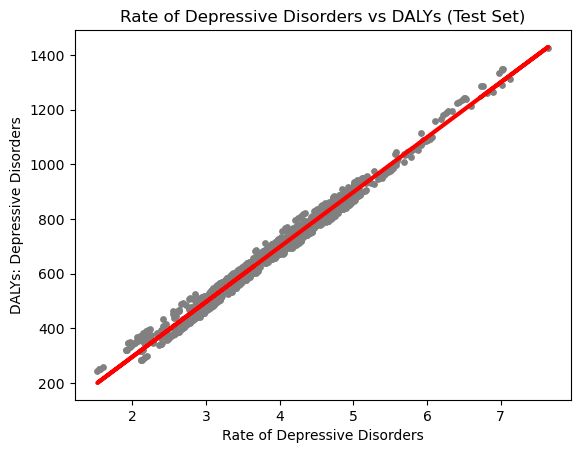

In [102]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s=15)  # Scatter plot of test set
plot_test.plot(X_test, y_predicted, color='red', linewidth=3)  # Regression line

# Adjust the title and labels to reflect the context of mental health analysis
plot_test.title('Rate of Depressive Disorders vs DALYs (Test Set)')
plot_test.xlabel('Rate of Depressive Disorders')
plot_test.ylabel('DALYs: Depressive Disorders')

# Show the plot
plot_test.show()

#### Own interpretation:

The scatter plot shows the relationship between the rate of depressive disorders (x-axis) and DALYs (disability-adjusted life years, y-axis) in the test set. The red line represents a fitted linear regression model.

The data points (in grey) appear to closely follow the red line, indicating a strong linear relationship between the rate of depressive disorders and DALYs. The spread of the points around the line is minimal, especially as the values increase, which suggests that the linear model is a good fit for this dataset. There are some small deviations at lower values, but overall, the line captures the trend of the data effectively.

Thus, I would conclude that the line fits the data well, and the linear model is an appropriate choice for describing this relationship.

In [129]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [104]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[200.94020342]]
Mean squared error:  499.8297430225592
R2 score:  0.9852612646757664


### insights

1. Slope: 200.94
For every 1 unit increase in the rate of depressive disorders, DALYs increase by about 200.94. This shows a strong positive relationship.
2. Mean Squared Error (MSE): 499.83
On average, predictions deviate from actual DALYs by 499 units squared, which is moderate considering the scale.
3. R² Score: 0.985
The model explains 98.5% of the variance in DALYs, indicating an excellent fit.

### summary:
The model fits the data very well, with a strong relationship between depressive disorder rates and DALYs.

#### What is it? 
1. Use RMSE when you want to assess how well your model predicts actual outcomes in practical terms, especially in the same units as the response variable. RMSE provides a measure of how well the model predicts the response variable in the same units as the original data. Lower RMSE values indicate better fit, with a RMSE of 0 indicating a perfect fit.

2. Use R² when you want to understand how much of the variance in the dependent variable is explained by the model and to compare the explanatory power of different models.

In [105]:
y_predicted

array([[ 623.27098212],
       [ 405.71414914],
       [ 456.35602353],
       ...,
       [1087.33486676],
       [ 846.91330926],
       [1247.08054011]])

In [106]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,633.04920,623.270982
1,464.64542,405.714149
2,424.94974,456.356024
3,771.16034,741.181387
4,364.44196,393.986817
5,398.17203,429.132203
6,634.82166,620.399506
7,492.12253,488.366762
8,505.38284,502.997741
9,577.76697,572.866217


##### Compare how the regression fits the training set

In [107]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [108]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [109]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[200.94020342]]
Mean squared error:  505.02485960925475
R2 score:  0.9863321160774791


Comparison: Test Set vs. Training Set

1. Slope:
Training Set: 200.94
Test Set: 200.94
The slopes are identical, indicating the relationship between depressive disorders and DALYs remains consistent across both datasets.
2. Mean Squared Error (MSE):
Training Set: 499.83
Test Set: 505.02
The MSE for the test set is slightly higher than the training set, indicating a marginally larger prediction error for unseen data. However, the difference (about 5 units squared) is minimal, suggesting the model generalizes well.
3. R² Score:
Training Set: 0.985
Test Set: 0.986
Both R² values are very high, with the test set performing slightly better (98.6% vs. 98.5%). This indicates that the model explains nearly all variance in both the training and test sets, with virtually no performance drop when applied to new data.
Summary:
The model performs almost identically on both the training and test sets. There is a negligible increase in prediction error on the test set, but the R² score even slightly improves, confirming that the model is not overfitting and generalizes well.

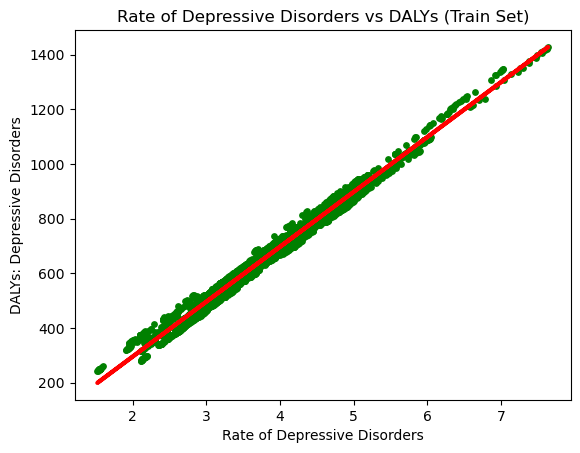

In [110]:
# Visualizing the training set results.

plot_train = plt
plot_train.scatter(X_train, y_train, color='green', s=15)  # Scatter plot of training set
plot_train.plot(X_train, y_predicted_train, color='red', linewidth=3)  # Regression line

# Adjust the title and labels to reflect the context of mental health analysis
plot_train.title('Rate of Depressive Disorders vs DALYs (Train Set)')
plot_train.xlabel('Rate of Depressive Disorders')
plot_train.ylabel('DALYs: Depressive Disorders')

# Show the plot
plot_train.show()

### reflections on Potential Data Bias:

Even though the model’s performance is strong, it’s important to consider potential biases in the dataset. For example, data on depressive disorders may be underreported or inconsistently tracked across regions, particularly in less developed countries, leading to biases in the actual rates. Also, factors like socioeconomic status or access to mental health resources could influence the recorded data and introduce hidden biases, affecting the overall model accuracy.